In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.typing as npt
import matplotlib.pyplot as plt

In [16]:
def plot_number(label: np.int_, pixels: npt.NDArray[np.int_]) -> None:
    sns.title(f"True label: {int(label)}")
    sns.imshow(np.reshape(pixels, (28, 28)), cmap="gray")
    sns.axis("off")
    sns.show()

In [17]:
def plot_empirical_error_convergence(loss: npt.NDArray[np.float_], nn_config: dict, annotate: bool = False) -> None:
    sns.set(style="darkgrid", color_codes=True, rc={"figure.figsize": (8, 5)})
    ax = sns.lineplot(data=loss, markers=True, marker="o", label=f'{nn_config["learning_rate"]}')
    plt.xticks(np.arange(len(loss)))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Convergence of empirical error")
    plt.legend()
    if annotate:
        for i, j in enumerate(loss):
            ax.annotate(str(np.round(j, 3)), xy=(i, j), xytext=(i, j+0.02))

In [18]:
results: pd.DataFrame = pd.read_json("data/results.json")
results.head()

,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,random_state_seed,test_size,batch_size,learning_rate,history
0,0.839333,"[0.8226950354609921, 0.914285714285714, 0.8561...","[0.928, 0.9815950920245391, 0.905797101449275,...","[0.8721804511278191, 0.946745562130177, 0.8802...","[[116, 0, 0, 0, 0, 0, 6, 0, 3, 0], [0, 160, 0,...",42,0.3,1,0.5,"{'loss': [1.092879772186279, 0.752254784107208..."
1,0.793333,"[0.9055118110236221, 0.9634146341463411, 0.794...","[0.92, 0.9693251533742331, 0.8695652173913041,...","[0.9126984126984121, 0.966360856269113, 0.8304...","[[115, 0, 2, 0, 0, 3, 5, 0, 0, 0], [0, 158, 1,...",42,0.3,1,1.0,"{'loss': [1.9398982524871822, 1.56107056140899..."
2,0.096000,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.012820512820512001...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.025316455696202, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 125], [0, 0, 0, 0...",42,0.3,1,10.0,"{'loss': [30.81227684020996, 52.57912826538086..."
3,0.906667,"[0.884057971014492, 0.935294117647058, 0.88652...","[0.976, 0.9754601226993861, 0.905797101449275,...","[0.927756653992395, 0.9549549549549551, 0.8960...","[[122, 0, 0, 0, 0, 2, 0, 0, 1, 0], [0, 159, 0,...",42,0.3,20,0.5,"{'loss': [1.009275555610656, 0.461651712656021..."
4,0.911333,"[0.9307692307692301, 0.9578313253012041, 0.917...","[0.968, 0.9754601226993861, 0.891304347826086,...","[0.9490196078431371, 0.966565349544073, 0.9044...","[[121, 0, 1, 0, 0, 1, 0, 0, 2, 0], [0, 159, 0,...",42,0.3,20,1.0,"{'loss': [0.8370137214660641, 0.37705305218696..."


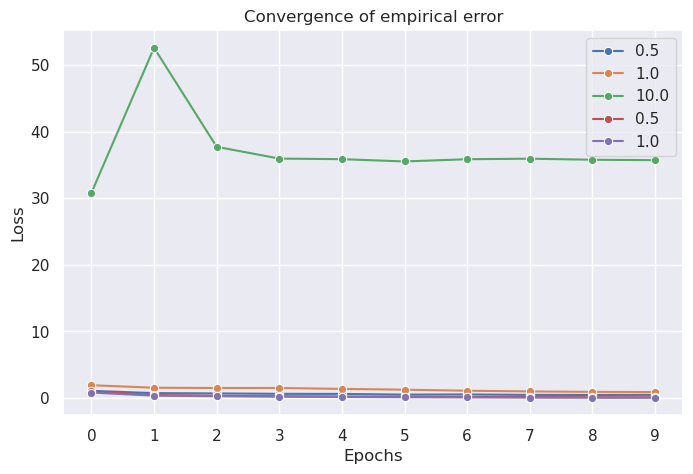

In [20]:
for i in range(5):
    loss = np.array(results.iloc[i].history["loss"])
    nn_config = {"learning_rate": results.iloc[i].learning_rate}
    plot_empirical_error_convergence(loss=loss, nn_config=nn_config)